In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#### Import library ####
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from scipy.fftpack import fft2, ifft2
from google.colab.patches import cv2_imshow

In [24]:
#### Define Image And Sensor Read Function ####
def image_read(image_path):
  return cv.imread(image_path, cv.IMREAD_GRAYSCALE)

In [25]:
#### Define Image Show Function ####
def image_show(image):
  return cv2_imshow(image)

#**A)**

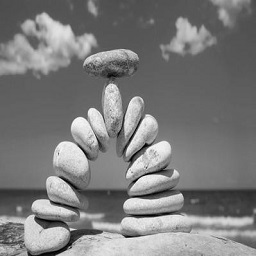

In [26]:
#### Read And Show Image ####
stone_path = '/content/drive/MyDrive/Digital Image Processing/HW4/stone.jpg'
stone = image_read(stone_path)
image_show(stone)

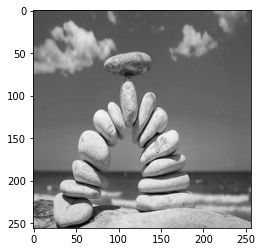

In [27]:
plt.imshow(stone, cmap='gray')

In [28]:
#### Read Sensor ####
sensor1_path = '/content/drive/MyDrive/Digital Image Processing/HW4/1.bmp'
sensor1 = image_read(sensor1_path)
sensor1.shape

(21, 21)

In [29]:
#### Define Degradation Function ####
def degrade(image, psf):

    padded_psf = np.zeros(image.shape)
    padded_psf[:psf.shape[0], :psf.shape[1]] = psf
    # Rescale Your Result to [0-255], Then Return Output
    image_fft = fft2(image)
    psf_fft = fft2(padded_psf)
    degraded = np.multiply(image_fft, psf_fft)
    degraded_image = ifft2(degraded).real
    degraded_image = ((degraded_image - np.min(degraded_image)) / (np.max(degraded_image) - np.min(degraded_image)) * 255).astype(int)
    # print(degraded_image.shape)
    return degraded_image

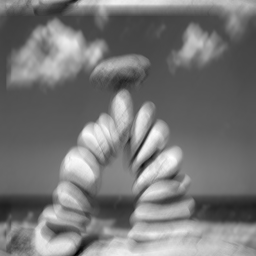

In [30]:
####    Degrade Image    ####
#### Show Degraded Image ####
degraded_image = degrade(stone, sensor1)
image_show(degraded_image)

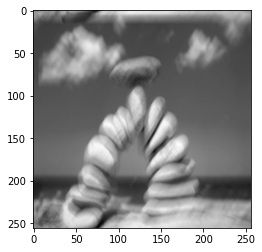

In [31]:
plt.imshow(degraded_image, cmap='gray')